<a href="https://colab.research.google.com/github/htapiagroup/sistdist/blob/master/MCA_SDU_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendiendo como la computadora "guarda" informacion

Antes de comenzar nuestras deambulaciones en computo paralelo, vamos a entender como se guarda la informacion en una computadora midiendo el uso de memoria a traves del interprete de Python.

Para eso usaremos la  funcion que sigue


In [0]:
import psutil, os

def huella_memoria():
  '''Regresa la huella de memoria usada por un proceso de Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)


# Memoria asignada en un arreglo

In [0]:
import numpy as np

In [4]:
antes = huella_memoria()

NameError: ignored

In [0]:
N = (1024**2)//8 # cantidad de valores de punto flotante que llenan 1 MB

In [0]:
x = np.random.rand(50*N) # arreglo de numeros que llena 50 MB

In [0]:
despues = huella_memoria()

In [0]:
print('Memoria antes: {} MB'.format(antes))

Memoria antes: 115.28515625 MB


In [0]:
print('Memoria despues: {} MB'.format(despues))

Memoria despues: 165.6171875 MB


# Memoria asignada en un calculo

In [13]:
antes = huella_memoria()
print('Memoria antes: {} MB'.format(antes))

Memoria antes: 165.80078125 MB


In [14]:
x**2

array([0.19122293, 0.66407732, 0.1330167 , ..., 0.04321395, 0.08955538,
       0.23767142])

In [15]:
despues = huella_memoria()
print('Memoria despues: {} MB'.format(despues))

Memoria despues: 215.9765625 MB


# Uso de memoria

Huella de memoria en bytes usada por Python para asignar el arreglo

In [16]:
x.nbytes

52428800

En megabytes

In [17]:
x.nbytes // (1024**2)

50

## Usando  DataFrame
`DataFrame` es una estructura de la libreria pandas que hace eficiente y sencillo el procesamiento de datos

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(x)

In [20]:
df.memory_usage(index=False) # memoria en bytes

0    52428800
dtype: int64

In [21]:
df.memory_usage(index=False) // (1024**2) # memoria en Megabytes

0    50
dtype: int64

## Ejercicio
 
Muestren cual es el uso memoria de generar la siguiente lista de temperaturas en celsius y luego al convertirlas a fahrenheit (para convertir de grados celsius a fahrenheit necesitan multiplicar por 9/5 y sumar 32).

1. cual el tamaño de memoria del arreglo `celsius` en MB
2. obtener la memoria total en MB que usa el programa __antes__ de ralizar la operacion (usar la funcion `huella_memoria`) 
3. convertir a fahrenheit
2. obtener la memoria total en MB que usa el programa __despues__ de ralizar la operacion (usar la funcion `huella_memoria`) 
5. cual es la diferencia de memoria consumida?
6. Antes de usar el atributo correspondiente para conocer el tamaño en memoria del arreglo `fahrenheit`, cual es su tamaño, en MB
7. ahora si comparen con el resultado del atributo

In [0]:
celsius = np.arange(-4,0,4/366000)

In [13]:
celsius

array([-4.00000000e+00, -3.99998907e+00, -3.99997814e+00, ...,
       -3.27869416e-05, -2.18579799e-05, -1.09290181e-05])

# Datos en partes

La memoria disponible y la capacidad de almacenamiento restringen los conjuntos de datos que podemos analizar. Es comun pensar y tratar a los datos en pedazos, partes o _chunks_
Veamos un poco como podemos hacer esto

In [24]:
ls -alp sample_data/

total 55512
drwxr-xr-x 1 root root     4096 Apr 29 16:32 ./
drwxr-xr-x 1 root root     4096 May  6 17:37 ../
-r-xr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Apr 29 16:32 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Apr 29 16:32 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Apr 29 16:32 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Apr 29 16:32 mnist_train_small.csv
-r-xr-xr-x 1 root root      903 Jan  1  2000 README.md


In [0]:
archivo = 'sample_data/california_housing_train.csv'

In [40]:
for chunk in pd.read_csv(archivo, chunksize=5000):
  print('tipo: %s forma %s' % (type(chunk), chunk.shape))

tipo: <class 'pandas.core.frame.DataFrame'> forma (5000, 9)
tipo: <class 'pandas.core.frame.DataFrame'> forma (5000, 9)
tipo: <class 'pandas.core.frame.DataFrame'> forma (5000, 9)
tipo: <class 'pandas.core.frame.DataFrame'> forma (2000, 9)


In [41]:
chunk.shape

(2000, 9)

In [42]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 15000 to 16999
Data columns (total 9 columns):
longitude             2000 non-null float64
latitude              2000 non-null float64
housing_median_age    2000 non-null float64
total_rooms           2000 non-null float64
total_bedrooms        2000 non-null float64
population            2000 non-null float64
households            2000 non-null float64
median_income         2000 non-null float64
median_house_value    2000 non-null float64
dtypes: float64(9)
memory usage: 140.7 KB


In [0]:
es_casa_vieja = (chunk.housing_median_age > 35)

In [47]:
chunk.loc[es_casa_vieja].shape

(1006, 9)

In [0]:
def filtra_es_casa_vieja(data):
  '''Returns DataFrame filtering houses over 35 years old'''
  es_casa_vieja = (data.housing_median_age > 35)
  return data.loc[es_casa_vieja]

In [0]:
chunks = []

In [0]:
for chunk in pd.read_csv(archivo, chunksize=1000):
  chunks.append(filtra_es_casa_vieja(chunk))

In [0]:
chunks = [filtra_es_casa_vieja(chunk) for chunk in pd.read_csv(archivo, chunksize=1000) ]

In [52]:
len(chunks)

17

In [0]:
lengths = [len(chunk) for chunk in chunks]

In [54]:
lengths[-5:]

[254, 181, 476, 620, 386]

In [0]:
casas_viejas_df = pd.concat(chunks)

In [56]:
casas_viejas_df.shape

(5191, 9)

In [0]:
import matplotlib.pyplot as plt

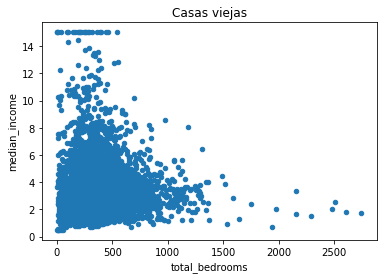

In [63]:
casas_viejas_df.plot.scatter(x='total_bedrooms', y='median_income',title='Casas viejas');